Author: xinyudeng (email: xinyu618@bu.edu)


In [2]:
# import the required libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


## Data Loading

In [3]:
# load the train_data
train_df = pd.read_csv('train.csv')

train_df.describe()

,Unnamed: 0,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Bankrupt?
count,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,...,5.455000e+03,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.0,5455.000000,5455.000000
mean,3408.896425,0.504850,0.558483,0.553227,0.607915,0.607898,0.998969,0.797377,0.809285,0.303502,...,1.995674e+07,0.623946,0.607913,0.840367,0.280434,0.027591,0.565197,1.0,0.047007,0.031164
std,1985.117561,0.060078,0.065299,0.061118,0.016327,0.016314,0.000879,0.002826,0.002763,0.004043,...,3.832637e+08,0.013268,0.016327,0.015754,0.015504,0.017339,0.013107,0.0,0.047214,0.173777
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.962961,0.616328,0.636191,0.062507,...,1.015558e-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,1671.500000,0.476235,0.535516,0.527062,0.600365,0.600351,0.998970,0.797386,0.809312,0.303466,...,9.050321e-04,0.623631,0.600363,0.840113,0.276945,0.026791,0.565158,1.0,0.024360,0.000000
50%,3403.000000,0.502901,0.559911,0.552278,0.605897,0.605868,0.999022,0.797464,0.809375,0.303525,...,2.119142e-03,0.623875,0.605897,0.841178,0.278786,0.026809,0.565254,1.0,0.033738,0.000000
75%,5148.500000,0.535197,0.588830,0.583730,0.613691,0.613655,0.999094,0.797579,0.809469,0.303585,...,5.313191e-03,0.624171,0.613687,0.842350,0.281520,0.026913,0.565722,1.0,0.052838,0.000000
max,6817.000000,0.864964,0.984736,0.932598,1.000000,1.000000,1.000000,0.850681,0.864386,0.446321,...,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,0.735958,1.0,1.000000,1.000000


## Data PreProcessing

In [4]:
# check for missing values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5455 entries, 0 to 5454
Data columns (total 97 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Unnamed: 0                                                5455 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  5455 non-null   float64
 2    ROA(A) before interest and % after tax                   5455 non-null   float64
 3    ROA(B) before interest and depreciation after tax        5455 non-null   float64
 4    Operating Gross Margin                                   5455 non-null   float64
 5    Realized Sales Gross Margin                              5455 non-null   float64
 6    Operating Profit Rate                                    5455 non-null   float64
 7    Pre-tax net Interest Rate                                5455 non-null   float64
 8    After-tax net Int

In [5]:
train_df.head()

,Unnamed: 0,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Bankrupt?
0,2490,0.412178,0.474270,0.457733,0.000000,0.000000,0.988045,0.784312,0.796607,0.303526,...,0.002466,0.626786,0.000000,0.838652,0.274813,0.026789,0.565148,1,0.743588,0
1,6721,0.477502,0.537015,0.531774,0.617492,0.617377,0.999009,0.797387,0.809315,0.303436,...,0.000633,0.623705,0.617488,0.840200,0.277850,0.027683,0.567464,1,0.040781,0
2,82,0.480622,0.487080,0.534611,0.617867,0.617867,0.999022,0.797242,0.809177,0.303157,...,0.010964,0.623702,0.617865,0.835834,0.288331,0.026665,0.564475,1,0.017324,0
3,3960,0.547701,0.546064,0.579314,0.608008,0.608008,0.999119,0.797613,0.809432,0.303601,...,0.004277,0.623114,0.608003,0.840497,0.276189,0.026910,0.565666,1,0.074439,0
4,2362,0.496271,0.556258,0.540232,0.598481,0.598481,0.999012,0.797448,0.809350,0.303535,...,0.001606,0.624292,0.598483,0.841437,0.282287,0.026821,0.565295,1,0.022960,0


In [6]:
train_df.shape

(5455, 97)

In [7]:
train_data = train_df.drop(columns = ['Unnamed: 0'])
train_data.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Bankrupt?
0,0.412178,0.474270,0.457733,0.000000,0.000000,0.988045,0.784312,0.796607,0.303526,0.767874,...,0.002466,0.626786,0.000000,0.838652,0.274813,0.026789,0.565148,1,0.743588,0
1,0.477502,0.537015,0.531774,0.617492,0.617377,0.999009,0.797387,0.809315,0.303436,0.781573,...,0.000633,0.623705,0.617488,0.840200,0.277850,0.027683,0.567464,1,0.040781,0
2,0.480622,0.487080,0.534611,0.617867,0.617867,0.999022,0.797242,0.809177,0.303157,0.781580,...,0.010964,0.623702,0.617865,0.835834,0.288331,0.026665,0.564475,1,0.017324,0
3,0.547701,0.546064,0.579314,0.608008,0.608008,0.999119,0.797613,0.809432,0.303601,0.781653,...,0.004277,0.623114,0.608003,0.840497,0.276189,0.026910,0.565666,1,0.074439,0
4,0.496271,0.556258,0.540232,0.598481,0.598481,0.999012,0.797448,0.809350,0.303535,0.781614,...,0.001606,0.624292,0.598483,0.841437,0.282287,0.026821,0.565295,1,0.022960,0


## Splitting Data into Training and Validation Sets

In [8]:
X = train_data.drop(columns=['Bankrupt?'])
y = train_data['Bankrupt?']
# Splitting the dataset into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

Training set shape: (4364, 95)
Validation set shape: (1091, 95)


# Imbalanced data (optional)

In [9]:
from imblearn.over_sampling import SMOTE

## apply SMOTE for Oversampling


In [10]:
# Initialize SMOTE for oversampling

smote = SMOTE(random_state=42)

# Apply SMOTE to the training data to address class imbalance
# This generates synthetic samples for the minority class
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("Training set shape after SMOTE:", X_train_smote.shape)
print("Validation set shape:", X_val.shape)
print("Number of bankrupt companies in the training set after SMOTE:", sum(y_train_smote))
print("Number of non-bankrupt companies in the training set after SMOTE:", len(y_train_smote) - sum(y_train_smote))
print("Proportion of bankrupt companies in the training set after SMOTE:", sum(y_train_smote) / len(y_train_smote))
print("validation set shape:", X_val.shape)

Training set shape after SMOTE: (8452, 95)
Validation set shape: (1091, 95)
Number of bankrupt companies in the training set after SMOTE: 4226
Number of non-bankrupt companies in the training set after SMOTE: 4226
Proportion of bankrupt companies in the training set after SMOTE: 0.5
validation set shape: (1091, 95)


## Model training

In [21]:
# import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score


In [23]:
# Dictionary of models with their respective initialization
original_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "Neural Network": MLPClassifier()
}

# Looping through each model to fit and evaluate them
for name, model in original_models.items():
    # Fitting the model on the training data
    model.fit(X_train, y_train)
    
    # Predicting on the validation set
    y_pred = model.predict(X_val)
    y_true = y_val  # True labels for comparison
    
    # Calculating the accuracy score
    accuracy = accuracy_score(y_val, y_pred)
    
    # Calculating F1 scores for both classes
    f1_scores = f1_score(y_true, y_pred, average=None)

    # Calculating the AUC score
    auc = roc_auc_score(y_val, y_pred)

    # Performing 5-fold cross-validation and computing mean and standard deviation of accuracy
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)

    # Printing the results for each model
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}, AUC: {auc:.4f}")
    print(f"{name} Cross-Validation Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print(f"F1-Score for Class 0: {f1_scores[0]:.4f}")
    print(f"F1-Score for Class 1: {f1_scores[1]:.4f}\n")


Model: Logistic Regression
Accuracy: 0.9679, AUC: 0.4986
Logistic Regression Cross-Validation Accuracy: 0.9645 (+/- 0.0068)
F1-Score for Class 0: 0.9837
F1-Score for Class 1: 0.0000

Model: K-Nearest Neighbors
Accuracy: 0.9661, AUC: 0.4976
K-Nearest Neighbors Cross-Validation Accuracy: 0.9688 (+/- 0.0034)
F1-Score for Class 0: 0.9828
F1-Score for Class 1: 0.0000

Model: Decision Tree
Accuracy: 0.9606, AUC: 0.6312
Decision Tree Cross-Validation Accuracy: 0.9498 (+/- 0.0099)
F1-Score for Class 0: 0.9797
F1-Score for Class 1: 0.2951

Model: Support Vector Machine
Accuracy: 0.9707, AUC: 0.5000
Support Vector Machine Cross-Validation Accuracy: 0.9684 (+/- 0.0011)
F1-Score for Class 0: 0.9851
F1-Score for Class 1: 0.0000

Model: Gradient Boosting
Accuracy: 0.9734, AUC: 0.6833
Gradient Boosting Cross-Validation Accuracy: 0.9677 (+/- 0.0053)
F1-Score for Class 0: 0.9864
F1-Score for Class 1: 0.4528

Model: XGBoost
Accuracy: 0.9753, AUC: 0.6842
XGBoost Cross-Validation Accuracy: 0.9698 (+/- 0.0

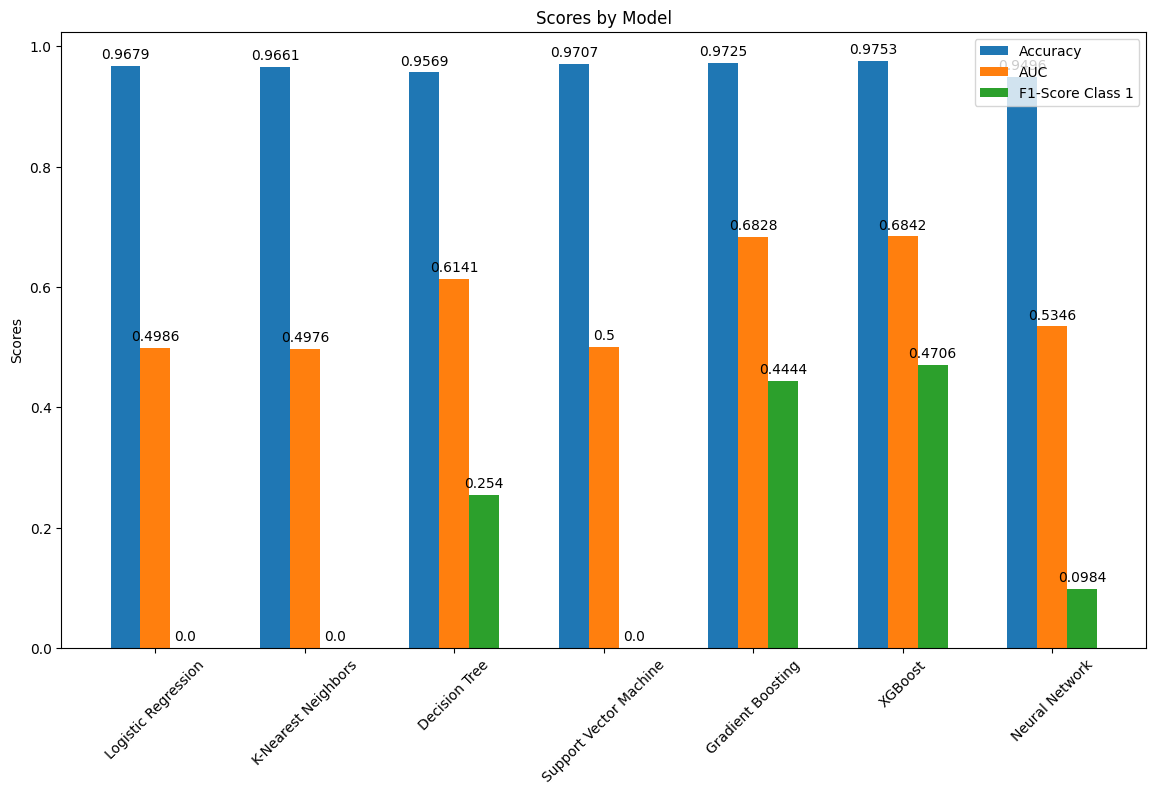

In [24]:
# plot the model
original_models = ["Logistic Regression", "K-Nearest Neighbors", "Decision Tree", 
          "Support Vector Machine", "Gradient Boosting", 
          "XGBoost", "Neural Network"]

# Performance metrics for each model
accuracies = [0.9679, 0.9661, 0.9569, 0.9707, 0.9725, 0.9753, 0.9496]
auc_scores = [0.4986, 0.4976, 0.6141, 0.5000, 0.6828, 0.6842, 0.5346]
f1_scores_class1 = [0.0000, 0.0000, 0.2540, 0.0000, 0.4444, 0.4706, 0.0984]

x = np.arange(len(original_models))  
width = 0.2  

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width, accuracies, width, label='Accuracy')
rects2 = ax.bar(x, auc_scores, width, label='AUC')
rects3 = ax.bar(x + width, f1_scores_class1, width, label='F1-Score Class 1')

ax.set_ylabel('Scores')
ax.set_title('Scores by Model')
ax.set_xticks(x)
ax.set_xticklabels(original_models, rotation=45)
ax.legend()

# Attach a text label above each bar
for rects in [rects1, rects2, rects3]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.show()

## Tune hyper-parameters

In [29]:
from sklearn.model_selection import GridSearchCV


In [54]:
# Hyperparameter grid for Logistic Regression
param_grid_decision_tree = {
    'max_depth': range(5, 50, 5),
    'min_samples_split': range(2, 20, 2),
    'min_samples_leaf': range(1, 20, 2)
}

# Initialize the DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
grid_search_decision_tree = GridSearchCV(decision_tree_model, param_grid_decision_tree, cv=5, verbose=2, n_jobs=-1) # cv=5 for 5-fold cross-validation, verbose=2 for logging, n_jobs=-1 to use all processors
grid_search_decision_tree.fit(X_train, y_train)
print(f"Best parameters for DecisionTreeClassifier: {grid_search_decision_tree.best_params_}")
print(f"Best score for DecisionTreeClassifier: {grid_search_decision_tree.best_score_}\n")


Fitting 5 folds for each of 810 candidates, totalling 4050 fits
Best parameters for DecisionTreeClassifier: {'max_depth': 10, 'min_samples_leaf': 11, 'min_samples_split': 10}
Best score for DecisionTreeClassifier: 0.96723125991782



In [60]:
# Hyperparameter grid for Gradient Boosting
param_grid_gradient_boosting = {
    'n_estimators': range(10, 50, 15),
    'max_depth': range(5, 10, 1),
    'min_samples_split': range(10, 50, 20),
    'min_samples_leaf': range(10, 50, 20),
    'learning_rate': np.linspace(0.1, 0.5, 10),
}

# Initialize the GradientBoostingClassifier
gradient_boosting_model = GradientBoostingClassifier()
grid_search_gradient_boosting = GridSearchCV(gradient_boosting_model, param_grid_gradient_boosting, cv=5, verbose=2, n_jobs=-1) # cv=5 for 5-fold cross-validation, verbose=2 for logging, n_jobs=-1 to use all processors
grid_search_gradient_boosting.fit(X_train, y_train)
print(f"Best parameters for GradientBoostingClassifier: {grid_search_gradient_boosting.best_params_}")
print(f"Best score for GradientBoostingClassifier: {grid_search_gradient_boosting.best_score_}\n")


Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Best parameters for GradientBoostingClassifier: {'learning_rate': 0.1, 'max_depth': 6, 'min_samples_leaf': 30, 'min_samples_split': 30, 'n_estimators': 25}
Best score for GradientBoostingClassifier: 0.9720443582710677



In [48]:
# Hyperparameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': range(30, 100, 15),
    'max_depth': range(5, 50, 5),
    'min_child_weight': range(1, 10, 1),
    'gamma': np.linspace(0, 0.5, 5),
    'learning_rate': [0.1, 0.3, 0.5],  
    'subsample': np.linspace(0.6, 1.0, 5),
    'colsample_bytree': np.linspace(0.6, 1.0, 5)
}

# Initialize the XGBClassifier
xgb_model = XGBClassifier()
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, verbose=2, n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)
print(f"Best parameters for XGBClassifier: {grid_search_xgb.best_params_}")
print(f"Best score for XGBClassifier: {grid_search_xgb.best_score_}\n")

Fitting 5 folds for each of 40500 candidates, totalling 202500 fits
Best parameters for XGBClassifier: {'colsample_bytree': 0.7, 'gamma': 0.125, 'learning_rate': 0.5, 'max_depth': 9, 'min_child_weight': 3, 'n_estimators': 50, 'subsample': 0.8}
Best score for XGBClassifier: 0.973418665994094



In [89]:
# Best hyperparameters for each model
best_params = {
    'DecisionTreeClassifier': {'max_depth': 10, 'min_samples_leaf': 11, 'min_samples_split': 10},
    'GradientBoostingClassifier': {'learning_rate': 0.15, 'max_depth': 6, 'min_samples_leaf': 30, 'min_samples_split': 30, 'n_estimators': 40},
    'XGBClassifier': {
        'colsample_bytree': 0.7, 'gamma': 0.125, 'learning_rate': 0.15, 
        'max_depth': 9, 'min_child_weight': 3, 'n_estimators': 35, 'subsample': 0.8
    },
}

# Initialize the models with the best hyperparameters
models = {
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'XGBClassifier': XGBClassifier(),
}

# Fit the models with the best hyperparameters
for name, model in models.items():
    model.set_params(**best_params[name]).fit(X_train, y_train)

# Evaluate the models with the best hyperparameters
model_scores = {}
for name, model in models.items():
    y_pred = model.predict(X_val) # Predictions
    y_prob = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else np.zeros(len(y_val)) # Probability for the positive class
    accuracy = accuracy_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_prob) if hasattr(model, "predict_proba") else np.nan
    f1_class0 = f1_score(y_val, y_pred, average='binary', pos_label=0)
    f1_class1 = f1_score(y_val, y_pred, average='binary', pos_label=1)
    
    model_scores[name] = {'Accuracy': accuracy, 'AUC': auc, 'F1 Class 0': f1_class0, 'F1 Class 1': f1_class1}

# Display the scores for each model
for name, scores in model_scores.items():
    print(f"Model: {name}")
    for metric, value in scores.items():
        print(f"  {metric}: {value:.4f}")
    print()

Model: DecisionTreeClassifier
  Accuracy: 0.9661
  AUC: 0.6565
  F1 Class 0: 0.9826
  F1 Class 1: 0.3273

Model: GradientBoostingClassifier
  Accuracy: 0.9762
  AUC: 0.9482
  F1 Class 0: 0.9878
  F1 Class 1: 0.5185

Model: XGBClassifier
  Accuracy: 0.9798
  AUC: 0.9554
  F1 Class 0: 0.9897
  F1 Class 1: 0.5600



## plot the model

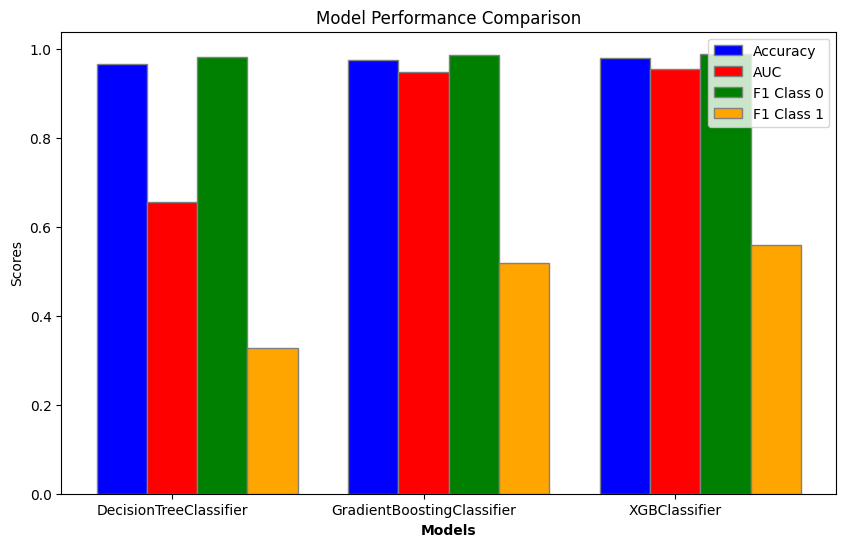

In [91]:
models = ["DecisionTreeClassifier", "GradientBoostingClassifier", "XGBClassifier"]

# Performance metrics for each model
accuracy_scores = [0.9661, 0.9762, 0.9798]
auc_scores = [0.6565, 0.9482, 0.9554]
f1_class0_scores = [0.9826, 0.9869, 0.9897]
f1_class1_scores = [0.3273, 0.5185, 0.5600]

barWidth = 0.2

r1 = np.arange(len(accuracy_scores))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.figure(figsize=(10, 6))

plt.bar(r1, accuracy_scores, color='blue', width=barWidth, edgecolor='grey', label='Accuracy')
plt.bar(r2, auc_scores, color='red', width=barWidth, edgecolor='grey', label='AUC')
plt.bar(r3, f1_class0_scores, color='green', width=barWidth, edgecolor='grey', label='F1 Class 0')
plt.bar(r4, f1_class1_scores, color='orange', width=barWidth, edgecolor='grey', label='F1 Class 1')

plt.xlabel('Models', fontweight='bold')
plt.ylabel('Scores')
plt.xticks([r + barWidth for r in range(len(accuracy_scores))], models)

plt.legend()
plt.title('Model Performance Comparison')
plt.show()

## fitting to test.csv

In [98]:
# Load the test data
test_df = pd.read_csv('test.csv')
test_df.describe()

,Unnamed: 0,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,...,1364.000000,1.364000e+03,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.0,1364.000000
mean,3409.414223,0.506497,0.559193,0.555034,0.608080,0.608056,0.997899,0.796442,0.808278,0.304107,...,0.807827,1.332111e+07,0.623789,0.608078,0.840542,0.280092,0.027342,0.566001,1.0,0.049865
std,1901.921526,0.063062,0.066909,0.063470,0.019177,0.019143,0.029029,0.028209,0.029899,0.023615,...,0.043846,3.479512e+08,0.007148,0.019177,0.007864,0.009188,0.004988,0.013620,0.0,0.059884
min,4.000000,0.082826,0.069287,0.088388,0.156308,0.156308,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.408682,0.156309,0.637576,0.133503,0.002439,0.511665,1.0,0.008500
25%,1810.750000,0.477392,0.535856,0.528080,0.600715,0.600715,0.998967,0.797384,0.809310,0.303466,...,0.796592,8.901071e-04,0.623662,0.600711,0.840132,0.276931,0.026791,0.565158,1.0,0.024925
50%,3436.500000,0.501999,0.559393,0.552278,0.606488,0.606495,0.999023,0.797462,0.809376,0.303527,...,0.810288,1.992806e-03,0.623892,0.606486,0.841182,0.278734,0.026805,0.565239,1.0,0.034075
75%,4930.500000,0.537708,0.589920,0.585577,0.614905,0.614824,0.999100,0.797580,0.809473,0.303584,...,0.826971,5.093259e-03,0.624156,0.614904,0.842381,0.281242,0.026913,0.565734,1.0,0.052785
max,6818.000000,1.000000,1.000000,1.000000,0.665151,0.665151,0.999635,1.000000,1.000000,1.000000,...,0.981315,9.390000e+09,0.704736,0.665149,0.916329,0.484318,0.136677,1.000000,1.0,0.942729


In [99]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1364 entries, 0 to 1363
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Unnamed: 0                                                1364 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  1364 non-null   float64
 2    ROA(A) before interest and % after tax                   1364 non-null   float64
 3    ROA(B) before interest and depreciation after tax        1364 non-null   float64
 4    Operating Gross Margin                                   1364 non-null   float64
 5    Realized Sales Gross Margin                              1364 non-null   float64
 6    Operating Profit Rate                                    1364 non-null   float64
 7    Pre-tax net Interest Rate                                1364 non-null   float64
 8    After-tax net Int

In [100]:
test_df.shape

(1364, 96)

In [101]:
test_data = test_df.drop(columns = ['Unnamed: 0'])
test_data.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.477843,0.543066,0.530971,0.601551,0.601385,0.998982,0.797425,0.809347,0.303560,0.781594,...,0.802411,0.002498,0.624508,0.601549,0.840452,0.277248,0.026933,0.565754,1,0.047947
1,0.471750,0.537178,0.526099,0.597198,0.597198,0.998968,0.797385,0.809313,0.303517,0.781572,...,0.798262,0.003474,0.623589,0.597193,0.840230,0.279860,0.028270,0.568097,1,0.028924
2,0.455906,0.503216,0.513357,0.606588,0.606740,0.998894,0.797101,0.809085,0.303177,0.781378,...,0.778362,0.016904,0.623824,0.606590,0.838494,0.280741,0.026606,0.564091,1,0.026206
3,0.491103,0.542575,0.543445,0.602668,0.602668,0.999013,0.797431,0.809345,0.303505,0.781602,...,0.801665,0.001678,0.625368,0.602668,0.840514,0.279999,0.026869,0.565504,1,0.028434
4,0.506849,0.550316,0.554901,0.602538,0.602409,0.999019,0.797417,0.809328,0.303467,0.781588,...,0.803628,0.001889,0.623598,0.602538,0.840614,0.278829,0.027218,0.566608,1,0.033571


In [106]:
# Fit the best model on the entire training data
xgb_model = XGBClassifier(**best_params['XGBClassifier'])
xgb_model.fit(X_train, y_train)

# Predict on the test data
predictions = xgb_model.predict(test_data)
test_data['Bankruptcy'] = predictions
test_data.to_csv('test_with_predictions.csv', index=False)
